<a href="https://colab.research.google.com/github/farhad06/Projects/blob/main/Tweeter-Sentiment-Analysis/Tweeter_Sentiment_Analysis_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


### **Dataset Information**

The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets.

Formally, given a training sample of tweets and labels, where label '1' denotes the tweet is racist/sexist and label '0' denotes the tweet is not racist/sexist, your objective is to predict the labels on the test dataset.

For training the models, we provide a labelled dataset of 31,962 tweets. The dataset is provided in the form of a csv file with each line storing a tweet id, its label and the tweet.


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#Load text classification pkg
import neattext.functions as nfx

In [2]:
!pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 114 kB 5.3 MB/s 


In [4]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/Twitter Sentiments.csv')

In [5]:
df.shape

(31962, 3)

In [6]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
df.label.value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


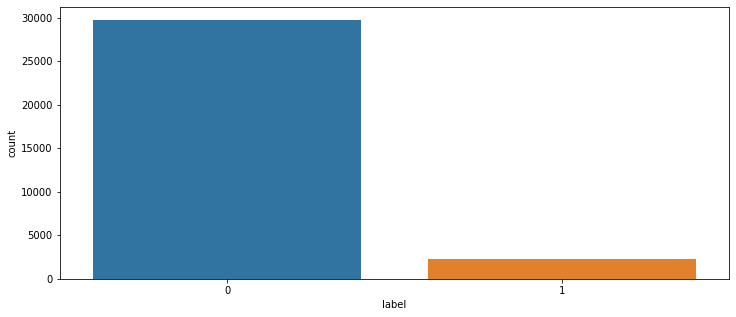

In [9]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(12,5)
sns.countplot(x='label',data=df)

In [10]:
#remove punctuation without #
def remove_punctuation(text):
    punctuations = '''!()-[]{};:'"\,<>./?@$%^&*_~'''
    punctuationfree="".join([i for i in text if i not in punctuations])
    return punctuationfree

In [11]:
df['clean_tweet']=df['tweet'].apply(remove_punctuation)

In [12]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is so...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for #lyft credit i cant use c...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [13]:
#Remove spacial Character
#df['clean_tweet']=df['clean_tweet'].apply(nfx.remove_special_characters)

In [14]:
#Remove spacial number
df['clean_tweet']=df['clean_tweet'].apply(nfx.remove_numbers)

In [15]:
df.tail()

,id,label,tweet,clean_tweet
31957,31958,0,ate @user isz that youuu?ðððððð...,ate user isz that youuuðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...,listening to sad songs on a monday morning otw...
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...",user #sikh #temple vandalised in in #calgary #...
31961,31962,0,thank you @user for you follow,thank you user for you follow


In [16]:
df[df['id']==655]

,id,label,tweet,clean_tweet
654,655,0,"â #gold off highs, back around $1,260 #bl...",â #gold off highs back around #blog #sil...


In [17]:
import warnings
warnings.filterwarnings('ignore')

In [18]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [19]:
def preprocess(text):
  tweet=[]
  doc=nlp(text)
  for token in doc:
      tweet.append(token.lemma_) 
  return " ".join(tweet)      

In [20]:
df['clean_tweet']=df['clean_tweet'].apply(preprocess)

In [21]:
df.head(10)

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,user when a father be dysfunctional and be s...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thank for # lyft credit I can not us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,# model I love u take with u all the time i...
4,5,0,factsguide: society now #motivation,factsguide society now # motivation
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before they le...
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user user us...
7,8,0,the next school year is the year for exams.ð...,the next school year be the year for examsð¯...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we win love the land # allin # cavs # champion...
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome here I m its so # gr


In [ ]:
#!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


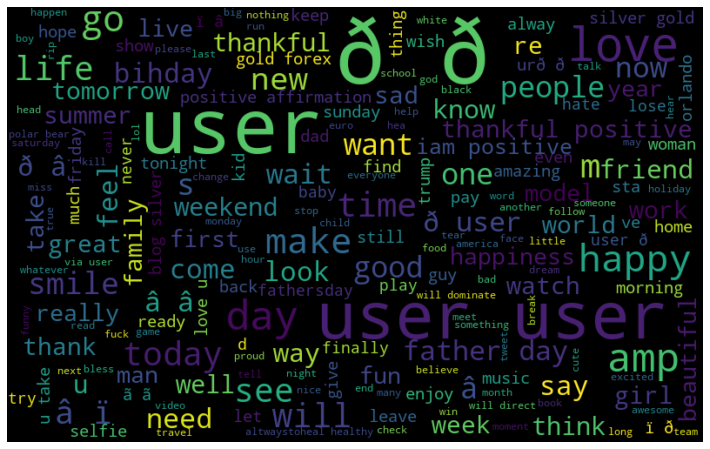

In [22]:
# visualize the frequent words
all_words = " ".join([sentence for sentence in df['clean_tweet']])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

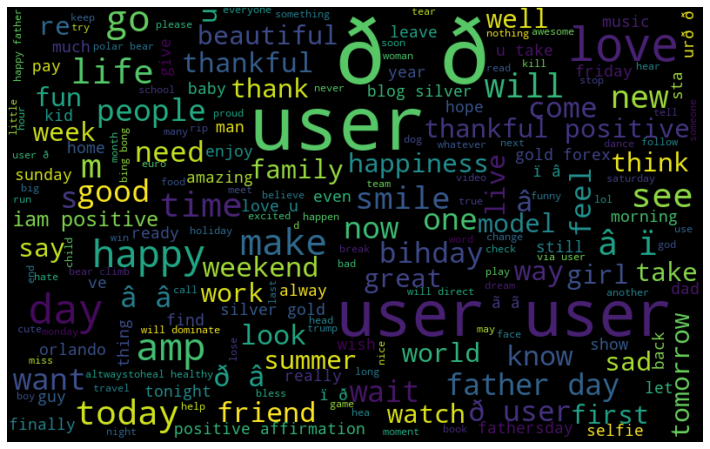

In [23]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

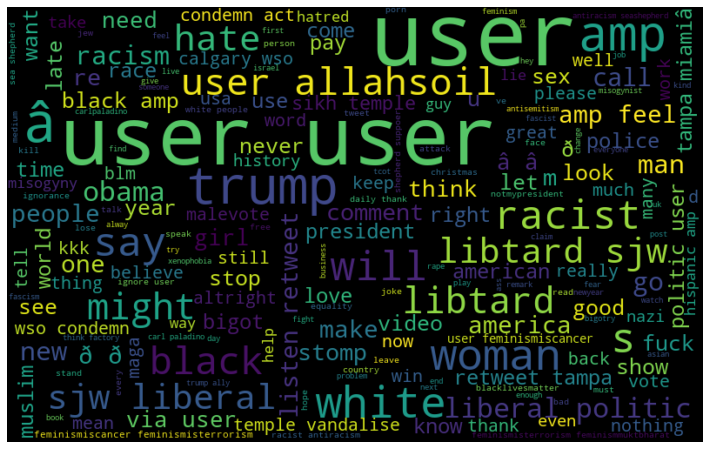

In [24]:
# frequent words visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

# plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [31]:
#train test split
from sklearn.model_selection import train_test_split
train,test= train_test_split(df, random_state=42, test_size=0.20)

In [32]:
train.head(2)

,id,label,tweet,clean_tweet
12110,12111,1,@user @user @user because i've been paying att...,user user user because I ve be pay attention f...
14081,14082,0,@user raft building at salford quays as pa of...,user raft building at salford quay as pa of ...


In [33]:
test.head(2)

,id,label,tweet,clean_tweet
12227,12228,0,@user âmy mom says my smile is captivatingâ...,user âmy mom say my smile be captivatingâ...
14709,14710,0,"in 3 days i will be meeting my sis-n-law, coun...",in day I will be meet my sisnlaw couney bowe...


In [34]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)

test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1,2))

train_features = vectorizer.fit_transform(train_clean_tweet)

test_features = vectorizer.transform(test_clean_tweet)

## **Logistic Regression**

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [38]:
logistic_model=LogisticRegression()

In [40]:
logistic_model.fit(train_features,train['label'])

LogisticRegression()

In [41]:
logistic_model.score(test_features,test['label'])

0.9597997810104802

In [42]:
logistic_model.classes_

array([0, 1])

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
rfc.score(X_test,y_test)

0.933299962457765

In [44]:
import pickle
with open('logistic_tweeter_sentiment_new.pkl','wb') as f:
  pickle.dump(logistic_model,f)

In [ ]:
import pickle
with open('random_forest_tweeter_sentiment.pkl','wb') as f:
  pickle.dump(rfc,f)

In [43]:
import pickle
with open('bow_vectorizer_1gram.pkl','wb') as f:
  pickle.dump(vectorizer,f)